Nama : YAGY CHRISTOPER SUMULE

Email : yagybatman@gmail.com

Asal : Kota Tangerang Selatan, Banten

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [3]:
# melakukan download file dalam bentuj zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-15 04:28:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  19.7MB/s    in 12s     

2020-10-15 04:28:36 (24.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper', 'scissors']

In [6]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [7]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [8]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [9]:
# membuat nama direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [10]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

In [11]:
# memecah direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# memecah direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# memecah direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [12]:
train_rock = os.path.join(train_dir,'rock')
train_paper = os.path.join(train_dir,'paper')
train_scissors = os.path.join(train_dir,'scissors')

val_rock = os.path.join(validation_dir,'rock')
val_paper = os.path.join(validation_dir,'paper')
val_scissors = os.path.join(validation_dir,'scissors')

# membuat direktori baru di dalam direktori train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [13]:
# mengcopy data train dan data val ke direktori baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [14]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [15]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [16]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [17]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [18]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [19]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [20]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [22]:
# membuat model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/20
25/25 - 43s - loss: 0.0619 - accuracy: 0.9787 - val_loss: 0.0524 - val_accuracy: 0.9875
Epoch 2/20
25/25 - 43s - loss: 0.0339 - accuracy: 0.9862 - val_loss: 0.0367 - val_accuracy: 0.9875
Epoch 3/20
25/25 - 43s - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0929 - val_accuracy: 0.9812
Epoch 4/20
25/25 - 43s - loss: 0.0794 - accuracy: 0.9700 - val_loss: 0.1358 - val_accuracy: 0.9688
Epoch 5/20
25/25 - 43s - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0760 - val_accuracy: 0.9688
Epoch 6/20
25/25 - 43s - loss: 0.0549 - accuracy: 0.9862 - val_loss: 0.1322 - val_accuracy: 0.9812
Epoch 7/20
25/25 - 43s - loss: 0.0412 - accuracy: 0.9887 - val_loss: 0.1168 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 43s - loss: 0.0381 - accuracy: 0.9900 - val_loss: 0.0168 - val_accuracy: 0.9875
Epoch 9/20
25/25 - 43s - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.1517 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 43s - loss: 0.0249 - accuracy: 0.9912 - val_loss: 0.0669 - val_accuracy: 0.9688
Epoch 11/

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')

plt.show()

Saving kertas.jpg to kertas.jpg
kertas.jpg
paper


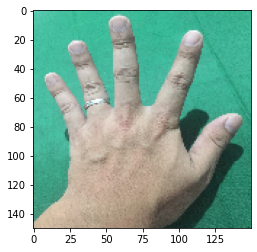

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')